# 📝 Exercise M7.01

In this exercise we will define dummy classification baselines and use them as
reference to assess the relative predictive performance of a given model of
interest.

We illustrate those baselines with the help of the Adult Census dataset, using
only the numerical features for the sake of simplicity.

In [1]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

First, define a `ShuffleSplit` cross-validation strategy taking half of the
samples as a testing at each round. Let us use 10 cross-validation rounds.

In [2]:
# Write your code here.
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(
    n_splits=10,
    test_size=0.2,
    random_state=0
)

Next, create a machine learning pipeline composed of a transformer to
standardize the data followed by a logistic regression classifier.

In [4]:
# Write your code here.
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
model = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

Compute the cross-validation (test) scores for the classifier on this dataset.
Store the results pandas Series as we did in the previous notebook.

In [6]:
# Write your code here.
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    model, data, target, cv=cv, n_jobs=2
)

cv_test_errors = pd.Series(
    cv_results["test_score"], name="Logistic regression"
)
cv_test_errors.describe()

count    10.000000
mean      0.812949
std       0.003793
min       0.808169
25%       0.809269
50%       0.813185
75%       0.815974
max       0.818610
Name: Logistic regression, dtype: float64

Now, compute the cross-validation scores of a dummy classifier that constantly
predicts the most frequent class observed the training set. Please refer to
the online documentation for the [sklearn.dummy.DummyClassifier
](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
class.

Store the results in a second pandas Series.

In [10]:
# Write your code here.
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()

cv_dummy = cross_validate(
    dummy, data, target,
    cv=cv, n_jobs=2
)
cv_dummy_errors = pd.Series(
    cv_dummy["test_score"], name="Dummy classifier"
)
cv_dummy_errors.describe()

count    10.000000
mean      0.760211
std       0.004040
min       0.754018
25%       0.758931
50%       0.759955
75%       0.763231
max       0.765790
Name: Dummy classifier, dtype: float64

Now that we collected the results from the baseline and the model, concatenate
the test scores as columns a single pandas dataframe.

In [12]:
# Write your code here.
all_errors = pd.concat(
    [cv_test_errors, cv_dummy_errors],
    axis=1
)
all_errors

,Logistic regression,Dummy classifier
0,0.812263,0.759546
1,0.813901,0.754120
2,0.818610,0.763947
3,0.808271,0.758727
4,0.808271,0.760262
5,0.816563,0.761081
6,0.808169,0.754018
7,0.812468,0.759648
8,0.814208,0.764971
9,0.816767,0.765790



Next, plot the histogram of the cross-validation test scores for both models
with the help of [pandas built-in plotting
function](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms).

What conclusions do you draw from the results?

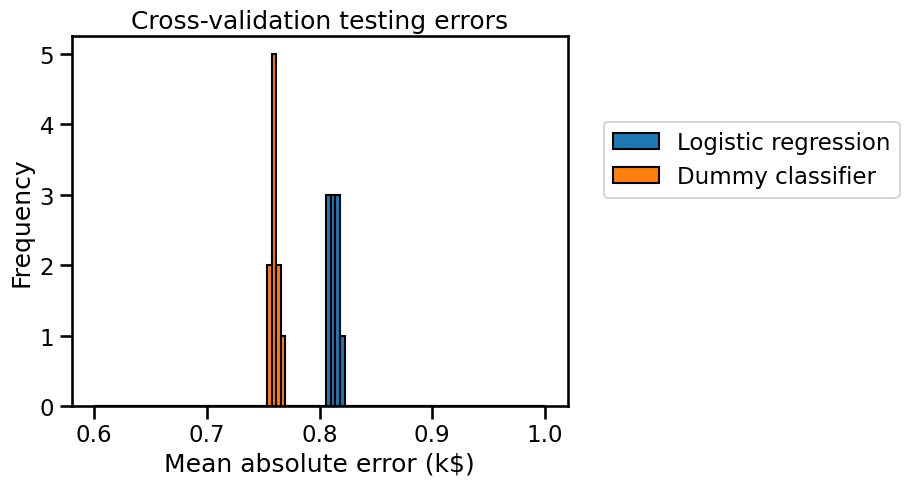

In [16]:
# Write your code here.
import matplotlib.pyplot as plt
import numpy as np

bins = np.linspace(start=0.6, stop=1, num=100)
all_errors.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Cross-validation testing errors")

Change the `strategy` of the dummy classifier to `"stratified"`, compute the
results. Similarly compute scores for `strategy="uniform"` and then the  plot
the distribution together with the other results.

Are those new baselines better than the previous one? Why is this the case?

Please refer to the scikit-learn documentation on
[sklearn.dummy.DummyClassifier](
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
to find out about the meaning of the `"stratified"` and `"uniform"`
strategies.

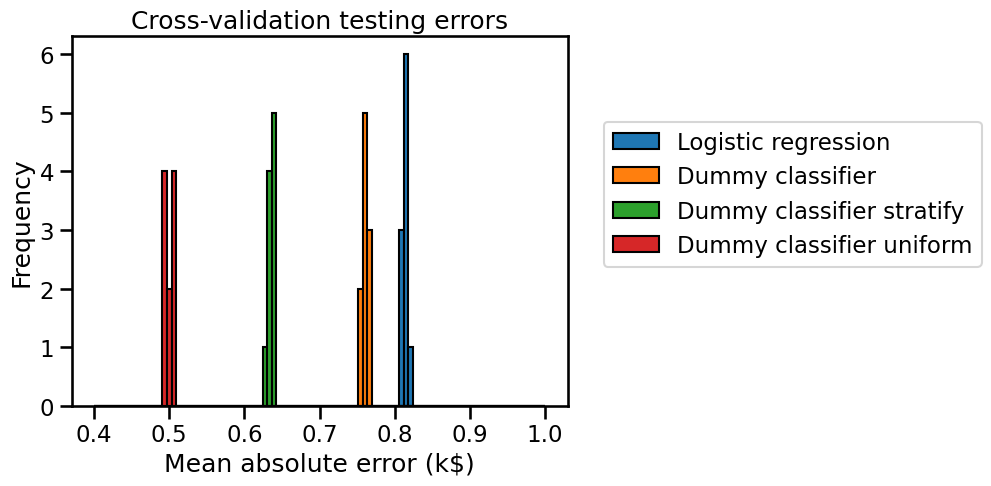

In [19]:
# Write your code here.
dummy_stratify = DummyClassifier(strategy="stratified")

cv_dummy_stratify = cross_validate(
    dummy_stratify, data, target,
    cv=cv, n_jobs=2
)
cv_dummy_stratify_errors = pd.Series(
    cv_dummy_stratify["test_score"], name="Dummy classifier stratify"
)


dummy_uniform = DummyClassifier(strategy="uniform")

cv_dummy_uniform = cross_validate(
    dummy_uniform, data, target,
    cv=cv, n_jobs=2
)
cv_dummy_uniform_errors = pd.Series(
    cv_dummy_uniform["test_score"], name="Dummy classifier uniform"
)


all_errors = pd.concat(
    [cv_test_errors, 
     cv_dummy_errors, 
     cv_dummy_stratify_errors,
     cv_dummy_uniform_errors
    ],
    axis=1
)

bins = np.linspace(start=0.4, stop=1, num=100)
all_errors.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Cross-validation testing errors")

By default, dummy stratify method is 'most_frequent', and because of the imbalanced dataset, it is the best dummy for this data. 
On the other hand, the uniform stratify just assign the label uniformly random. So the accuracy is at 50% at represented in the above figure.
However, the "stratified" strategy will randomly generate predictions by respecting the training set’s class distribution, resulting in some wrong predictions even for the most frequent class, hence we obtain a lower accuracy.

